<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Merge-datasets" data-toc-modified-id="Merge-datasets-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Merge datasets</a></span></li><li><span><a href="#Nettoyage" data-toc-modified-id="Nettoyage-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Nettoyage</a></span><ul class="toc-item"><li><span><a href="#Valeurs-nulles" data-toc-modified-id="Valeurs-nulles-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Valeurs nulles</a></span></li><li><span><a href="#Valeurs-manquantes" data-toc-modified-id="Valeurs-manquantes-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Valeurs manquantes</a></span></li></ul></li><li><span><a href="#Ajout-des-variables" data-toc-modified-id="Ajout-des-variables-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Ajout des variables</a></span></li><li><span><a href="#Analyse-exploratoire" data-toc-modified-id="Analyse-exploratoire-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Analyse exploratoire</a></span></li><li><span><a href="#Feature-transformation" data-toc-modified-id="Feature-transformation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Feature transformation</a></span></li><li><span><a href="#KMeans" data-toc-modified-id="KMeans-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>KMeans</a></span><ul class="toc-item"><li><span><a href="#Elbow-plot" data-toc-modified-id="Elbow-plot-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Elbow plot</a></span></li><li><span><a href="#Silhouette-plot" data-toc-modified-id="Silhouette-plot-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Silhouette plot</a></span></li><li><span><a href="#Cluster-visualizations" data-toc-modified-id="Cluster-visualizations-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Cluster visualizations</a></span><ul class="toc-item"><li><span><a href="#t-SNE" data-toc-modified-id="t-SNE-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>t-SNE</a></span></li><li><span><a href="#APC" data-toc-modified-id="APC-6.3.2"><span class="toc-item-num">6.3.2&nbsp;&nbsp;</span>APC</a></span></li></ul></li><li><span><a href="#Cluster-analysis." data-toc-modified-id="Cluster-analysis.-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Cluster analysis.</a></span><ul class="toc-item"><li><span><a href="#Tailles-des-clusters" data-toc-modified-id="Tailles-des-clusters-6.4.1"><span class="toc-item-num">6.4.1&nbsp;&nbsp;</span>Tailles des clusters</a></span></li><li><span><a href="#Caractères-des-clusters" data-toc-modified-id="Caractères-des-clusters-6.4.2"><span class="toc-item-num">6.4.2&nbsp;&nbsp;</span>Caractères des clusters</a></span></li></ul></li></ul></li><li><span><a href="#DBSCAN" data-toc-modified-id="DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>DBSCAN</a></span></li><li><span><a href="#Hierachical-clustering" data-toc-modified-id="Hierachical-clustering-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Hierachical clustering</a></span></li><li><span><a href="#Model-selection" data-toc-modified-id="Model-selection-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Model selection</a></span></li><li><span><a href="#Cluster-analysis" data-toc-modified-id="Cluster-analysis-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Cluster analysis</a></span><ul class="toc-item"><li><span><a href="#Distribution-des-cluster-entre-les-top-5-villes" data-toc-modified-id="Distribution-des-cluster-entre-les-top-5-villes-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Distribution des cluster entre les top 5 villes</a></span></li><li><span><a href="#Chiffre-d'affair-par-cluster" data-toc-modified-id="Chiffre-d'affair-par-cluster-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Chiffre d'affair par cluster</a></span></li><li><span><a href="#Produit-préféré-par-cluster" data-toc-modified-id="Produit-préféré-par-cluster-10.3"><span class="toc-item-num">10.3&nbsp;&nbsp;</span>Produit préféré par cluster</a></span></li></ul></li><li><span><a href="#Maintenaince" data-toc-modified-id="Maintenaince-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Maintenaince</a></span></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter("ignore", category=FutureWarning)

![alt text](shcema.png "Title")

## Merge datasets

In [3]:
df_order = pd.read_csv("\\olist_orders_dataset.csv")
df_order_items = pd.read_csv("\\olist_order_items_dataset.csv")
df_review = pd.read_csv("\\olist_order_reviews_dataset.csv")
df_payment = pd.read_csv("\\olist_order_payments_dataset.csv")
df_seller = pd.read_csv("\\olist_sellers_dataset.csv")
df_customer = pd.read_csv("\\olist_customers_dataset.csv")
df_product = pd.read_csv("\\olist_products_dataset.csv")
df_geo = pd.read_csv("\\olist_geolocation_dataset.csv")
df_categ_en = pd.read_csv("\\product_category_name_translation.csv")

In [4]:
# Fusionner les jeus des données
df = df_order.merge(df_order_items, on='order_id').merge(df_review, on='order_id').merge(df_payment, on='order_id')
df = df.merge(df_product, on='product_id')
df = df.merge(df_customer, on='customer_id', how='outer')
df = df.merge(df_seller, on='seller_id')
df = df.merge(df_categ_en, on="product_category_name")

In [5]:
# Inspecter les colonnes
pd.set_option('display.max_columns', None)
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,credit_card,1.0,18.12,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3.0,voucher,1.0,2.00,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,2.0,voucher,1.0,18.59,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP,housewares
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,b46f1e34512b0f4c74a72398b03ca788,4.0,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36,1.0,credit_card,3.0,37.77,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,9350,maua,SP,housewares
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,dc90f19c2806f1abba9e72ad3c350073,5.0,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23,1.0,credit_card,1.0,37.77,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,9350,maua,SP,housewares


In [6]:
# Suprimer le nom du produit brésilien, ne garder que la version anglaise
df.drop(columns='product_category_name',inplace=True)
df.rename(columns={
    'price': 'product_price',
    'product_category_name_english': 'product_category_name'
}, inplace=True)

In [7]:
# La taille des données
df.shape

(115609, 39)

## Nettoyage

### Valeurs nulles

In [8]:
# Chercher des valeurs nulles
(df==0).sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date       0
order_delivered_customer_date      0
order_estimated_delivery_date      0
order_item_id                      0
product_id                         0
seller_id                          0
shipping_limit_date                0
product_price                      0
freight_value                    387
review_id                          0
review_score                       0
review_comment_title               0
review_comment_message             0
review_creation_date               0
review_answer_timestamp            0
payment_sequential                 0
payment_type                       0
payment_installments               3
payment_value                      6
product_name_lenght                0
product_description_lenght         0
product_photos_qty                 0
p

La plupart des zéros sont dans la variable freight_value. Apart de  si ces produits numériques qui ne nécessitent pas de transport, ils seront supprimés.

In [9]:
# Inspecter les catogories des produits qui ont des valeurs nulles dans freight_value
df.loc[df.freight_value ==0]['product_category_name'].value_counts()

watches_gifts       215
furniture_decor     103
garden_tools         56
bed_bath_table        9
health_beauty         1
auto                  1
office_furniture      1
books_imported        1
Name: product_category_name, dtype: int64

Évidemment, ce ne sont pas des produits numériques. Ces lignes contenant des valeurs nulles sont ensuite supprimées.

In [10]:
for col in df.columns:
    df.drop(index=df.loc[df[col] == 0].index, inplace=True)

### Valeurs manquantes

In [11]:
# Chercher des valeurs manquentes
df.isna().sum().sum()

171646

In [12]:
# Inspecter les pourcentages des valeurs maquantes dans les colonnes
(df.isna().sum()/len(df)).sort_values(ascending=False)

review_comment_title             0.881611
review_comment_message           0.576980
order_delivered_customer_date    0.020798
order_delivered_carrier_date     0.010373
order_approved_at                0.000122
product_height_cm                0.000009
product_weight_g                 0.000009
product_length_cm                0.000009
product_width_cm                 0.000009
order_id                         0.000000
product_name_lenght              0.000000
product_description_lenght       0.000000
product_photos_qty               0.000000
customer_unique_id               0.000000
payment_installments             0.000000
customer_zip_code_prefix         0.000000
customer_city                    0.000000
customer_state                   0.000000
seller_zip_code_prefix           0.000000
seller_city                      0.000000
seller_state                     0.000000
payment_value                    0.000000
review_answer_timestamp          0.000000
payment_type                     0

La présence de valeurs manquantes dans les variables liées au message de commentaire est compréhensible et sera ignorée.<br>
*order_delivered_customer_date* et *order_delivered_carrier_date* sont interchangeables.

In [13]:
# Remplir les valeurs manquantes avec des valeurs les unes des autres dans ces colonnes
df['order_delivered_customer_date'].fillna(df['order_delivered_carrier_date'],inplace=True)
df['order_delivered_carrier_date'].fillna(df['order_delivered_customer_date'],inplace=True)

In [14]:
df['order_approved_at'].fillna(df['order_purchase_timestamp'], inplace=True)

Suppression des valeurs manquantes des colonnes ci-dessous car il y a peu de montant.

In [15]:
df.dropna(subset=['order_approved_at',
                  'order_delivered_carrier_date',
                  'order_delivered_customer_date',
                  'product_weight_g',
                  'product_length_cm',
                  'product_height_cm',
                  'product_width_cm'], inplace=True)

## Ajout des variables

Maintenant que les données sont nettoyéés, le dataset de géolocalisation peuvent être intégrées.

In [16]:
# Il y a beaucoup de latitudes et de longitudes différentes. 
# Je ferai la moyenne des deux variables en fonction du code postal.
df_latlng = df_geo.groupby('geolocation_zip_code_prefix')['geolocation_lat','geolocation_lng'].mean().reset_index()
df_latlng.rename(columns={'geolocation_zip_code_prefix': 'zip_code_prefix'}, inplace=True)

In [17]:
# Merge géolocalisation pour les clients
df = df.merge(df_latlng, left_on='customer_zip_code_prefix',
              right_on='zip_code_prefix')

df.drop(columns='zip_code_prefix', inplace=True)

df.rename(columns={'geolocation_lat': 'customer_lat',
          'geolocation_lng': 'customer_lng'}, inplace=True)

In [18]:
# Merge géolocalisation pour les vendeurs
df = df.merge(df_latlng, left_on='seller_zip_code_prefix',
              right_on='zip_code_prefix')

df.drop(columns='zip_code_prefix', inplace=True)

df.rename(columns={'geolocation_lat': 'seller_lat',
          'geolocation_lng': 'seller_lng'}, inplace=True)

In [19]:
# Ajouter le variable: distance entre clients et vendeurs
def haversine_np(lon1, lat1, lon2, lat2):
    """
    code found on stackoverflow:
    https://stackoverflow.com/questions/29545704/fast-haversine-approximation-python-pandas
    
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km
df['customer_seller_distance'] = haversine_np(df['customer_lng'],df['customer_lat'],df['seller_lng'],df['seller_lat'])

In [20]:
# Ajouter variable for la quantities des produits commandés par commande
qty_product = df.groupby(['order_id','product_id'])['product_id'].count().to_frame()
qty_product.columns=['qty_product_ordered']
qty_product.reset_index(inplace=True)

df = df.merge(qty_product,on=['order_id','product_id'])

In [21]:
# Convertir les variables datetime au dtype datetime
var_datetime = ['order_purchase_timestamp',
                'order_approved_at',
                'order_delivered_carrier_date',
                'order_delivered_customer_date',
                'order_estimated_delivery_date',
                'shipping_limit_date',
                'review_creation_date',
                'review_answer_timestamp']

for var in var_datetime:
    df[var] = pd.to_datetime(df[var])

In [22]:
df['order_date'] = df.order_purchase_timestamp.dt.date

In [23]:
df['order_monthyear'] = df.order_purchase_timestamp.dt.to_period('M') 

In [24]:
# Ajouter variable le délai de livraison
df['duration_delivery_day'] = (
    df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.total_seconds() / (3600*12)
df['duration_delivery_day'] = round(df['duration_delivery_day'], 2)

In [25]:
# Ajouter variable de la différence entre le délai de livraison estimé et le délai de livraison réel
df['estimate_actual_delivery_diff_day'] = (
    df['order_estimated_delivery_date'] - df['order_delivered_customer_date']).dt.total_seconds() / (3600*12)
df['estimate_actual_delivery_diff_day'] = round(
    df['estimate_actual_delivery_diff_day'], 2)

In [26]:
# Ajouter variable recency
recent_purchase = df.groupby('customer_id')[
    'order_purchase_timestamp'].max().to_frame().reset_index()
recent_purchase.rename(
    columns={'order_purchase_timestamp': 'most_recent_purchase_date'}, inplace=True)

df = df.merge(recent_purchase, on='customer_id', how='inner')

df.rename(columns={'most_recent_purchase_date':'recency'}, inplace=True)

# Ce jeu de données date de plus de 4 ans. 
# Je calculerai recency à partir du début de 2019 pour maximiser la variance de cette feature.
df['recency'] = pd.to_datetime(df['recency']).rsub(pd.Timestamp('2019-01-01').floor('d')).dt.days

In [27]:
# Ajouter variable frequency
purchase_frequency = df.groupby('customer_id')['order_id'].count().to_frame().reset_index()

purchase_frequency.rename(columns={'order_id': 'frequency'}, inplace=True)

df = df.merge(purchase_frequency, on='customer_id', how='inner')

In [28]:
# Ajouter variable monetary
total_purchase_value = df.groupby(
    'customer_id')['payment_value'].sum().to_frame().reset_index()
total_purchase_value.rename(
    columns={'payment_value': 'monetary'}, inplace=True)

df = df.merge(total_purchase_value, on='customer_id', how='inner')

In [29]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,product_price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,product_category_name,customer_lat,customer_lng,seller_lat,seller_lng,customer_seller_distance,qty_product_ordered,order_date,order_monthyear,duration_delivery_day,estimate_actual_delivery_diff_day,recency,frequency,monetary
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,1.0,credit_card,1.0,18.12,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP,housewares,-23.576983,-46.587161,-23.680729,-46.444238,18.564447,3,2017-10-02,2017-10,16.87,14.21,455,3,38.71
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,3.0,voucher,1.0,2.00,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP,housewares,-23.576983,-46.587161,-23.680729,-46.444238,18.564447,3,2017-10-02,2017-10,16.87,14.21,455,3,38.71
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,2.0,voucher,1.0,18.59,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP,housewares,-23.576983,-46.587161,-23.680729,-46.444238,18.564447,3,2017-10-02,2017-10,16.87,14.21,455,3,38.71
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,b46f1e34512b0f4c74a72398b03ca788,4.0,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19,2017-08-20 15:16:36,1.0,credit_card,3.0,37.77,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,9350,maua,SP,housewares,-23.564630,-46.534268,-23.680729,-46.444238,15.826239,1,2017-08-15,2017-08,5.69,18.77,503,1,37.77
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,dc90f19c2806f1abba9e72ad3c350073,5.0,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08,2017-08-08 23:26:23,1.0,credit_card,1.0,37.77,40.0,268.0,4.0,500.0,19.0,8.0,13.0,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,9350,maua,SP,housewares,-23.600462,-46.655318,-23.680729,-46.444238,23.265542,1

## Analyse exploratoire

In [30]:
# Nombre des clients
nb_customer = len(df.customer_id.unique())
print('Number of clients:', nb_customer)

Number of clients: 94740


Chercher les proportions de clients uniques-achat et répétiteurs.

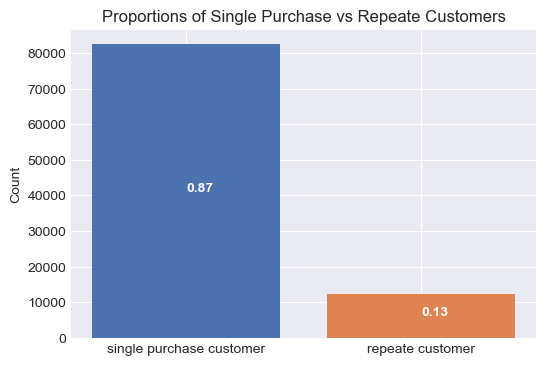

In [31]:
colors = ['goldenrod', 'slateblue']

# Créer une liste avec the quantities des clients uniques-achat et répétiteurs
singel_vs_repeate = pd.cut(df.groupby('customer_id')['order_id'].count().values, bins=[
                0, 1, np.inf], labels=['single purchase customer', 'repeate customer']).value_counts()

# Bar plot
# X-axis et y-axis
labels = singel_vs_repeate.index
bar_height = singel_vs_repeate.values

plt.figure(figsize=(6, 4))
plt.style.use('seaborn-darkgrid')

plt.bar(labels, bar_height, color=sns.color_palette('deep'))

for i in range(len(labels)):
    plt.text(x=labels[i],
             y=bar_height[i]/2,
             s=round(bar_height[i] / bar_height.sum(), 2),
             size=10,
             color='white',
             weight='demibold')

plt.title('Proportions of Single Purchase vs Repeate Customers', fontsize=12)
plt.ylabel('Count', fontsize=10)
plt.savefig('bar_plot_single_vs_repeate_customer',dpi=300, bbox_inches='tight')
plt.show()

In [32]:
# Dates auxquelles les nombres de commandes le plus élevé 
order_count = df.groupby(['order_date'])['order_id'].count().to_frame().reset_index()
order_count.columns = ['order_date', 'order_count']
order_count = order_count.sort_values(by='order_count')

In [33]:
# Dates auxquelles le chiffre d'affair le plus élevé 
sales_amount = df.groupby(['order_date', 'order_id'])['payment_value'].mean().to_frame().reset_index()
sales_amount = sales_amount.groupby('order_date')['payment_value'].sum().to_frame().reset_index().sort_values(by='payment_value', ascending=False)

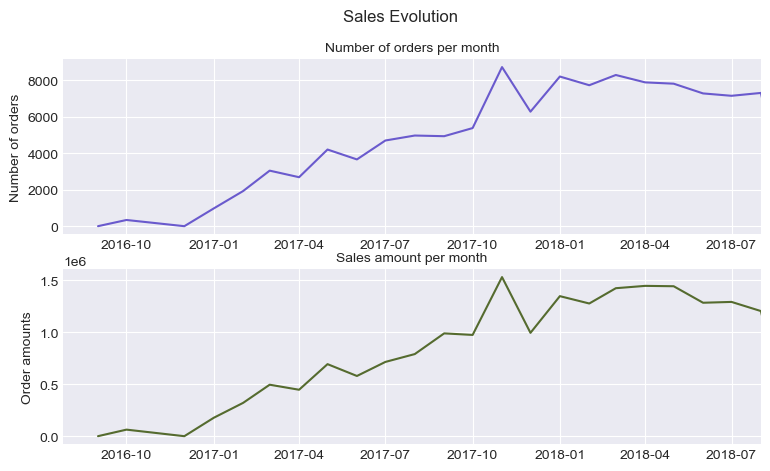

In [34]:
# Sales revolutions by month, in terms of number of order and the amount of sales.

# X-axis
month = df.groupby('order_monthyear')['order_id'].count().index.to_timestamp()

# Les y-axis
nb_order = df.groupby('order_monthyear')['order_id'].count().values
amount_order = df.groupby('order_monthyear')['payment_value'].sum().values

pd.plotting.register_matplotlib_converters()

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(9, 5))

# Line plot du nombre de commandes par mois
axes[0].plot(month, nb_order, color='slateblue',)
axes[0].set_title('Number of orders per month', fontsize=10)
axes[0].set_ylabel('Number of orders')
axes[0].tick_params(axis='x', labelrotation=0)
axes[0].set_xlim(right='2018-08-01') # Coupure en août 2018, puisque septembre 2018 n'a que 3 jours de données

# Line plot du chiffre d'affaire par mois
axes[1].plot(month, amount_order, color='darkolivegreen')
axes[1].set_title('Sales amount per month', fontsize=10)
axes[1].set_ylabel('Order amounts')
axes[1].tick_params(axis='x', labelrotation=0)
axes[1].set_xlim(right='2018-08-01') 

plt.suptitle('Sales Evolution', fontsize=12)
plt.savefig('line_plot_sales_evolution',dpi=300, bbox_inches='tight')
plt.show()

In [35]:
print('Day with the highest number of orders:\n', 
      df.groupby('order_date')['order_id'].count().sort_values(ascending=False).head(1))

Day with the highest number of orders:
 order_date
2017-11-24    1385
Name: order_id, dtype: int64


In [36]:
print('Day with the highest sum of transaction:\n', 
      df.groupby('order_date')['payment_value'].sum().sort_values(ascending=False).head(1))

Day with the highest sum of transaction:
 order_date
2017-11-24    252881.94
Name: payment_value, dtype: float64


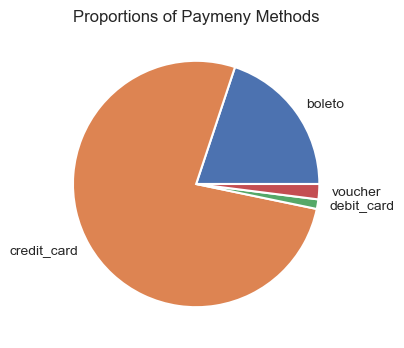

In [37]:
# Examinez les proportions des méthodes de paiement avec un plot de camembert
groups = df.groupby('payment_type')['payment_value'].sum().index
values = df.groupby('payment_type')['payment_value'].sum().values

plt.figure(figsize=(6, 4))
plt.pie(values, labels=groups, 
        labeldistance=1.1, 
        colors=sns.color_palette('deep'), 
        wedgeprops={'linewidth': 1.5, 'edgecolor': 'white'})
plt.title('Proportions of Paymeny Methods', fontsize=12)
plt.savefig('pie_chart_payment_method',dpi=300, bbox_inches='tight')
plt.show()

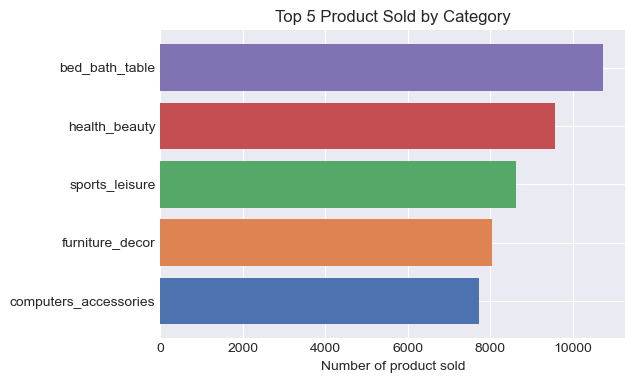

In [38]:
# Créer un sous echantillon avec les 5 produits meilleurs vendus
df_order_unique = df.drop_duplicates(subset='order_id',keep='first')
top_sold_product = df_order_unique.groupby('product_category_name')['qty_product_ordered'].sum()
top_sold_product = top_sold_product.sort_values().tail(5)

# Bar plot
labels = top_sold_product.index
bar_height = np.sort(top_sold_product.values)

plt.figure(figsize=(6, 4))
plt.barh(labels,bar_height,color=sns.color_palette('deep'))

plt.title('Top 5 Product Sold by Category', fontsize=12)
plt.xlabel('Number of product sold', fontsize=10)
plt.savefig('barh_plot_top_5_products',dpi=300, bbox_inches='tight')
plt.show()

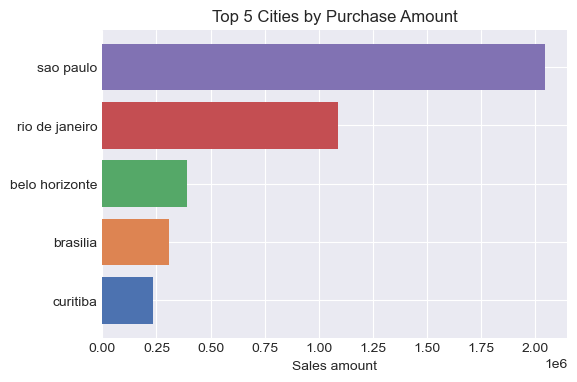

In [39]:
# Créer un sous echantillon avec les plus grand villes en terme de chiffre d'affairs 
top_5_sales_cities = df_order_unique.groupby('customer_city')[
    'payment_value'].sum().sort_values().tail(5)

# Bar plot
labels = top_5_sales_cities.index
bar_height = top_5_sales_cities.values

plt.figure(figsize=(6, 4))
plt.barh(labels,bar_height,color=sns.color_palette('deep'))

plt.title('Top 5 Cities by Purchase Amount', fontsize=12)
plt.xlabel('Sales amount', fontsize=10)
plt.savefig('barh_plot_top_5_city_by_sales',dpi=300, bbox_inches='tight')
plt.show()

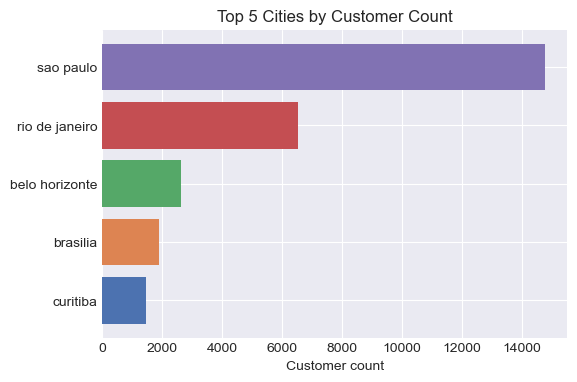

In [40]:
# Créer un sous echantillon avec les plus grand villes en terme des nombres des clients 
top_5_customer_cities = df_order_unique.groupby('customer_city')[
    'customer_id'].count().sort_values().tail(5)

# Bar plot
labels = top_5_customer_cities.index
bar_height = np.sort(top_5_customer_cities.values)

plt.figure(figsize=(6, 4))
plt.barh(labels,bar_height,color=sns.color_palette('deep'))
plt.title('Top 5 Cities by Customer Count', fontsize=12)
plt.xlabel('Customer count', fontsize=10)
plt.savefig('barh_plot_top_5_city_qty_product',dpi=300, bbox_inches='tight')
plt.show()

## Feature transformation

Parce que ce projet vient de la prospective marketing, je n'utiliserai que des features connexes pour les modèles. C'est-à-dire *recency, frequency, monetary et review_score*.

In [41]:
three_features = ['recency', 'frequency', 'monetary']
four_features=['recency', 'frequency', 'monetary','review_score']

In [42]:
# Regroupez les données par customer_id afin que chaque ligne représente un(e) seul(e) client(e)
df_customer = df.groupby('customer_id')['recency', 'frequency', 'monetary','review_score'].mean().reset_index()

Les outliers doivent être traitées pour s'assurer qu'elles ne faussent pas trop les clusters.

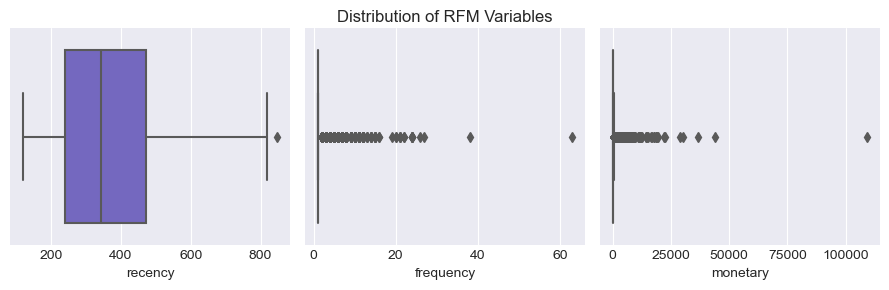

In [43]:
# Boîte à moustaches pour inspecter la présence de valeurs aberrantes
figure, axes = plt.subplots(1, 3, sharex=False, figsize=(9, 3))
rfm = ['recency', 'frequency', 'monetary']
for i, col in enumerate(rfm):
    sns.boxplot(x=df_customer[col], ax=axes[i], color='slateblue')
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.suptitle("Distribution of RFM Variables", fontsize=12)
plt.savefig('boxplot_rfm_distribution_before',dpi=300, bbox_inches='tight')
plt.show()

Les variables frequency et monetary ont des valeurs aberrantes. Selon la nature et les quantités, elles peuvent être supprimées.

In [44]:
df_customer['frequency'].value_counts()

1.0     82389
2.0      9416
3.0      1486
4.0       778
6.0       268
5.0       229
7.0        46
8.0        39
12.0       20
10.0       14
9.0        11
11.0       11
15.0        6
24.0        5
14.0        5
21.0        3
13.0        3
16.0        2
20.0        2
22.0        2
27.0        1
38.0        1
26.0        1
63.0        1
19.0        1
Name: frequency, dtype: int64

Les clients avec une fréquence supérieure à 20 sont très peu nombreux. Les supprimer.

In [45]:
# Enlever les outliers dans frequency
frequency_outlier_idx = df_customer.loc[df_customer['frequency'] > 20].index
df_customer.drop(index=frequency_outlier_idx, inplace=True)

In [46]:
df_customer['monetary'].sort_values(ascending=False).head(10)

8180     109312.64
70675     44048.00
1976      36489.24
11862     30186.00
87671     29099.52
86020     22346.60
51791     21874.05
91629     19457.04
41892     19174.38
6224      18384.75
Name: monetary, dtype: float64

Les clients avec une monetary supérieure à 20K sont très peu nombreux. Les supprimer.

In [47]:
monetary_outlier_idx = df_customer.loc[df_customer['monetary'] > 20000].index
df_customer.drop(index=monetary_outlier_idx, inplace=True)

Transformation des features.

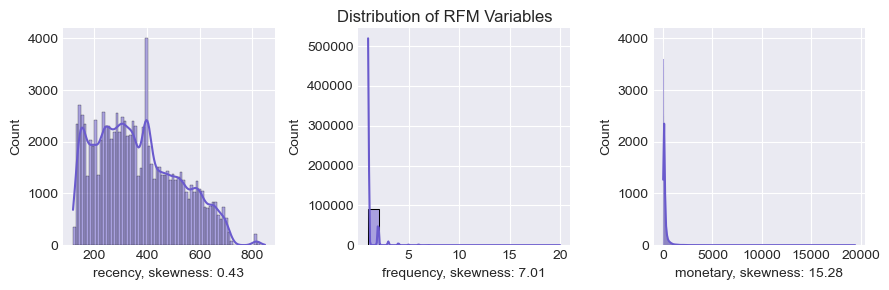

In [48]:
# Insepction des symétries
figure, axes = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(9, 3))

for i, col in enumerate(rfm):
    sns.histplot(x=df_customer[col], 
                 kde=True, 
                 ax=axes[i], 
                 color='slateblue'
                )
    axes[i].set_xlabel(f"{col}, skewness: {round(df_customer[col].skew(),2)}")

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.suptitle("Distribution of RFM Variables", fontsize=12)
plt.savefig('histogram_rfm_skew',dpi=300, bbox_inches='tight')
plt.show()

Peu d'asymétrie dans recency. Beaucoup d'asymétrie dans monetary

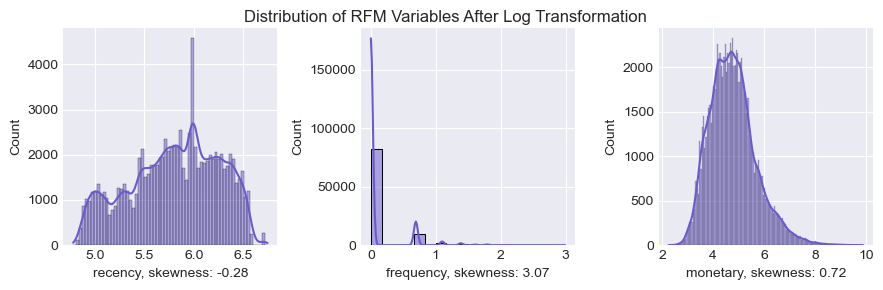

In [49]:
figure, axes = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(9, 3))

for i, col in enumerate(rfm):
    sns.histplot(x=np.log(df_customer[col]), kde=True, ax=axes[i], color='slateblue')
    axes[i].set_xlabel(f"{col}, skewness: {round(np.log(df_customer[col]).skew(),2)}")

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.suptitle("Distribution of RFM Variables After Log Transformation", fontsize=12)
plt.savefig('histogram_rfm_skew_corrected',dpi=300, bbox_inches='tight')
plt.show()

L'asymétrie s'est améliorée après la transformation du journal.<br> 
Frequency sera laissée telle quelle.

## KMeans

J'examinerai le clustering KMeans en utilisant deux sous-ensembles : un avec des variables RFM uniquement (three_features), le second avec review_score ajouté (four_features).

In [50]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [51]:
# Créer un sous-ensemble avec des features RFM
df_3_features = df_customer[three_features].copy()
df_3_features['customer_id'] = df_customer['customer_id']

df_3_features[['recency', 'monetary']]=np.log(df_3_features[['recency', 'monetary']])

df_3_fearture_scaled = pd.DataFrame(scaler.fit_transform(df_3_features[three_features]), 
                                    columns=three_features)

In [52]:
# Créer un sous-ensemble avec 4 features
df_4_features = df_customer[four_features].copy()
df_4_features['customer_id'] = df_customer['customer_id']
df_4_features[['recency', 'monetary']]=np.log(df_4_features[['recency', 'monetary']])

df_4_fearture_scaled = pd.DataFrame(scaler.fit_transform(df_4_features[four_features]), 
                                    columns=four_features)

In [53]:
# Une fonction pour afficher le elbow plot
def elbow(data, k, nb_feature, ax):
    model = KMeans(random_state=42)
    visualizer = KElbowVisualizer(model,
                                  k=(2, 10),
                                  timings=False,
                                  locate_elbow=True,
                                  ax=ax
                                  )
    visualizer.fit(data)
    visualizer.ax.set_title(f"Elbow plot for KMeans clustering with {nb_feature} features")

In [54]:
# Une fonction pour afficher le silhouette plot
def silhouette_plot(data, k, nb_feature, ax):
    model = KMeans(k, random_state=42)
    visualizer = SilhouetteVisualizer(model,
                                      ax=ax
                                      )
    visualizer.fit(data)
    visualizer.ax.set_title(
        f"Silhouette plot for KMeans clustering with {nb_feature} features")

### Elbow plot
Choisir le nombre K.

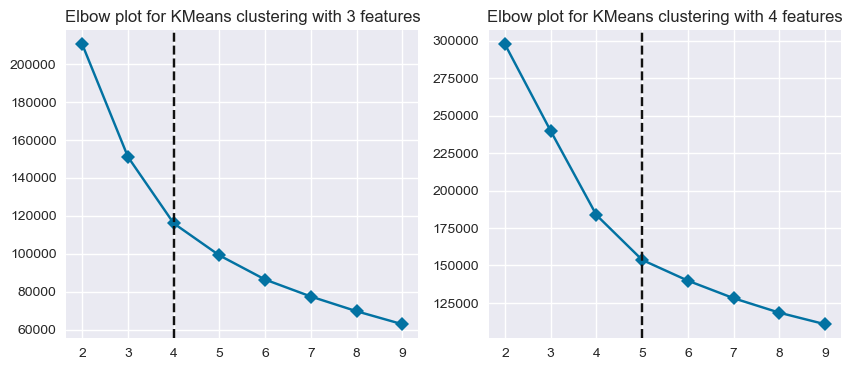

In [55]:
plt.style.use('seaborn-darkgrid')

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,4))

elbow(df_3_fearture_scaled, np.arange(2, 10), 3, axes[0])
elbow(df_4_fearture_scaled, np.arange(2, 10), 4, axes[1])

plt.savefig('elbow_plot_3_features',bbox_inches='tight',dpi=300)
plt.show()

En regardant les graphiques ci-dessus, le nombre optinum pour k est 4 pour 3 features, 5 pour 4 features.

### Silhouette plot

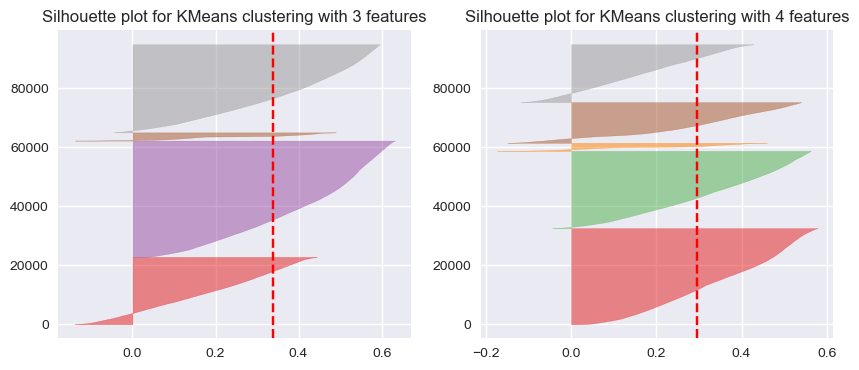

In [56]:
plt.style.use('seaborn-darkgrid')

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,4))

silhouette_plot(df_3_fearture_scaled, 4, 3, axes[0])
silhouette_plot(df_4_fearture_scaled, 5, 4, axes[1])

plt.savefig('silhouette_plot_3_features',bbox_inches='tight',dpi=300)
plt.show()

Les silhouette plots montrent que les clusters sont bien séparés

In [57]:
# Créer les models kmeans
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)

kmean_3_features = KMeans(n_clusters=4, init='k-means++', random_state=42).fit(df_3_fearture_scaled)
kmean_4_features = KMeans(n_clusters=5, init='k-means++', random_state=42).fit(df_4_fearture_scaled)

In [58]:
df_3_features['cluster'] = kmean_3_features.labels_
df_4_features['cluster'] = kmean_4_features.labels_

### Cluster visualizations

Projection de données avec réduction de dimensionnalité

#### t-SNE

In [59]:
# Une function pour affichir les data sur tSNE
from sklearn.manifold import TSNE

def cluster_viz_tsne(data, labels, model_name, nb_feature):
    tsne = TSNE(n_components=2,
                random_state=42,
                init='pca',
                learning_rate='auto').fit_transform(data)
    df_tsne = pd.DataFrame(tsne)
    df_tsne['cluster'] = labels
    df_tsne.columns = ['x1', 'x2', 'cluster']

    sns.scatterplot(data=df_tsne,
                    x='x1',
                    y='x2',
                    hue='cluster',
                    alpha=0.5,
                    palette='tab10',)
    plt.title(f"Data Projected on TSNE, Clustered by {model_name} with {nb_feature} Features", fontsize=12)

In [60]:
# Une function pour affichir les data sur APC
from sklearn.decomposition import PCA

def cluster_viz_pca(data, labels, model_name, nb_feature):
    pca = PCA(n_components=2)
    df_pca = pd.DataFrame(pca.fit_transform(data), columns=['pc1', 'pc2'])
    df_pca['cluster'] = labels
    pc1_explained_variance = round(pca.fit(data).explained_variance_ratio_[0]*100,2)
    pc2_explained_variance = round(pca.fit(data).explained_variance_ratio_[1]*100,2)

    sns.scatterplot(data=df_pca,
                    x='pc1',
                    y='pc2',
                    hue='cluster',
                    s=30,
                    alpha=0.5,
                    palette='tab10',)
    
    plt.xlabel(f"PC1({pc1_explained_variance}%)")
    plt.ylabel(f"PC1({pc2_explained_variance}%)")
    
    plt.title(f"Data Projected on PCA, Clustered by {model_name} with {nb_feature} Features", fontsize=12)

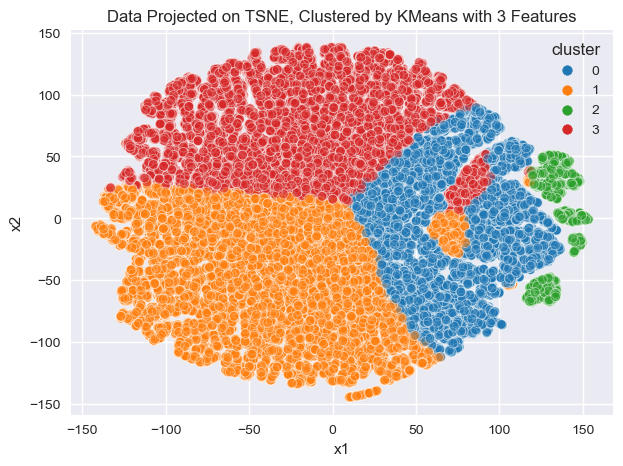

In [61]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(7,5))
cluster_viz_tsne(df_3_fearture_scaled,kmean_3_features.labels_, 'KMeans', 3)
plt.savefig('tsne_kmeans_3_features',bbox_inches='tight',dpi=300)
plt.show()

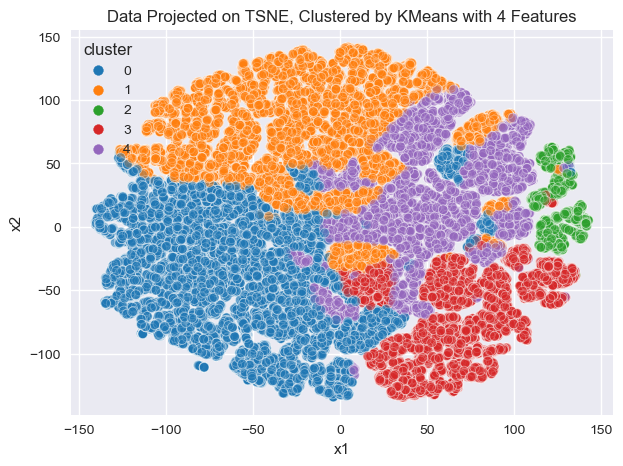

In [62]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(7,5))
cluster_viz_tsne(df_4_fearture_scaled,kmean_4_features.labels_, 'KMeans', 4)
plt.savefig('tsne_kmeans_4_features',bbox_inches='tight',dpi=300)
plt.show()

Les clusters semblent beaucoup plus serrés sur TSNE avec 3 features. Les clusters effectués de 4 features semblent se chevaucher quelque peu.

#### APC

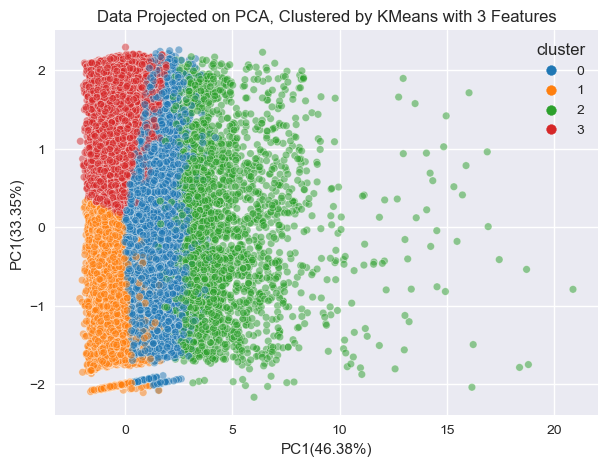

In [63]:
plt.style.use('seaborn-darkgrid')

plt.figure(figsize=(7,5))

cluster_viz_pca(df_3_fearture_scaled,kmean_3_features.labels_, 'KMeans', 3,)

plt.savefig('pca_kmeans_3_features',bbox_inches='tight',dpi=300)
plt.show()

Le cluster 2 est fortement impacté par les valeurs extrêmes.

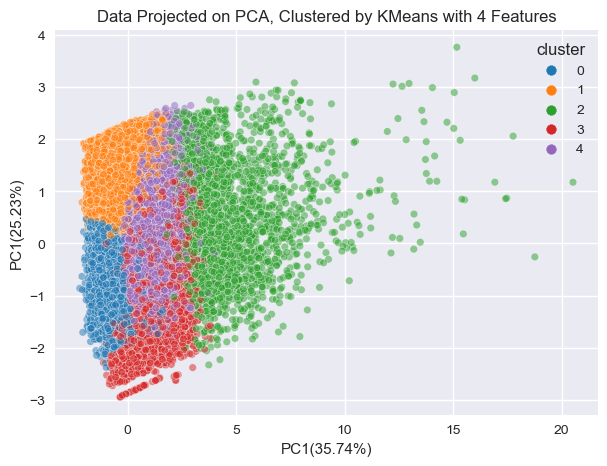

In [64]:
plt.style.use('seaborn-darkgrid')

plt.figure(figsize=(7,5))

cluster_viz_pca(df_4_fearture_scaled,kmean_4_features.labels_, 'KMeans', 4,)

plt.savefig('pca_kmeans_4_features',bbox_inches='tight',dpi=300)
plt.show()

Le cluster 2 est fortement impacté par les valeurs extrêmes. De petites sections des clusters 3 et 4 se chevauchent, suggérant des traits similaires entre ces deux clusters.

### Cluster analysis.

#### Tailles des clusters

In [65]:
def cluster_customer_count_plot(data, model_name, nb_feature):
    customer_count = data.groupby('cluster')['customer_id'].nunique()

    labels = customer_count.index
    bar_height = customer_count.values
    y_pos = np.arange(len(labels))

    plt.bar(labels,
            bar_height,
            color=sns.color_palette('deep'),
            width=0.6)

    for i in range(len(labels)):
        plt.text(x=labels[i]-0.2,
                 y=bar_height[i]-bar_height[i]/2, s=bar_height[i],
                 size=10,
                 color='white',
                 weight='demibold')

    plt.xticks(y_pos)
    plt.yticks(ticks=[])
    plt.title(
        f"Customer Count per Cluster, {model_name} with {nb_feature} Features", fontsize=12)
    plt.xlabel('Cluster', fontsize=10)
    plt.ylabel('Number of customers', fontsize=10)


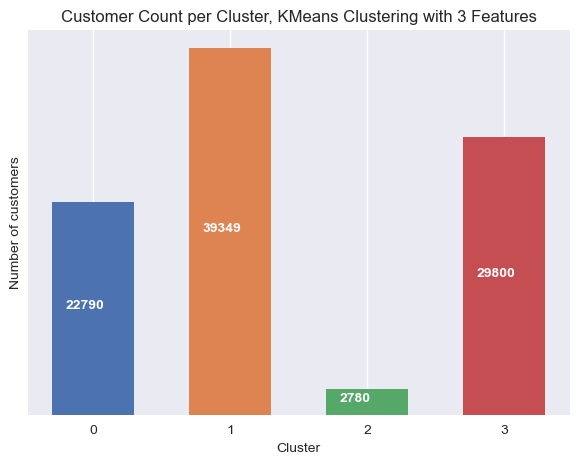

In [66]:
plt.figure(figsize=(7,5))
cluster_customer_count_plot(df_3_features, 'KMeans Clustering', 3)
plt.savefig('bar_plot_customer_cluster_count_kmeans_3_features',bbox_inches='tight',dpi=300)
plt.show()

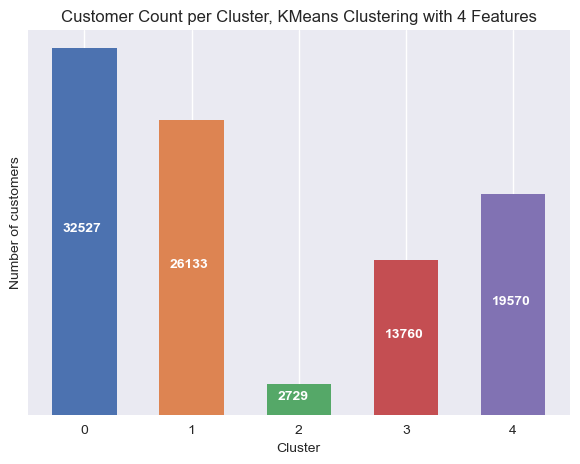

In [67]:
plt.figure(figsize=(7,5))
cluster_customer_count_plot(df_4_features, 'KMeans Clustering', 4)
plt.savefig('bar_plot_customer_cluster_count_kmeans_4_features',bbox_inches='tight',dpi=300)
plt.show()

Les clusters produites par les deux modèles sont de taille significative. Dans les deux cas, le cluster 2 est petit en taille.

#### Caractères des clusters

In [68]:
df_customer['cluster_kmean_3_feature'] =  kmean_3_features.labels_
df_customer['cluster_kmean_4_feature'] =  kmean_4_features.labels_

In [69]:
def cluster_boxplot(data,labels, features,model_name,nb_feature):
    plt.style.use('seaborn-darkgrid')
    figure, axes = plt.subplots(nrows=round(len(features)/2),
                                ncols=2,
                                sharex=False,
                                sharey=False,
                                figsize=figsize)
    y = 0
    for i, col in enumerate(features):
        i, j = divmod(y, 2)
        sns.boxplot(data=data, 
                    y=col, 
                    x=labels, 
                    ax=axes[i, j],
                    palette='deep', 
                    showfliers=False, 
                    width=0.5,
                    medianprops={"linewidth": 1},
                    whiskerprops={"linewidth": 1},
                    capprops={"linewidth": 1},
                    boxprops={"linewidth": 1})
        y = y + 1

    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    plt.suptitle(f"Cluster Analysis, {model_name} Clustering with {nb_feature} Features", fontsize=12)

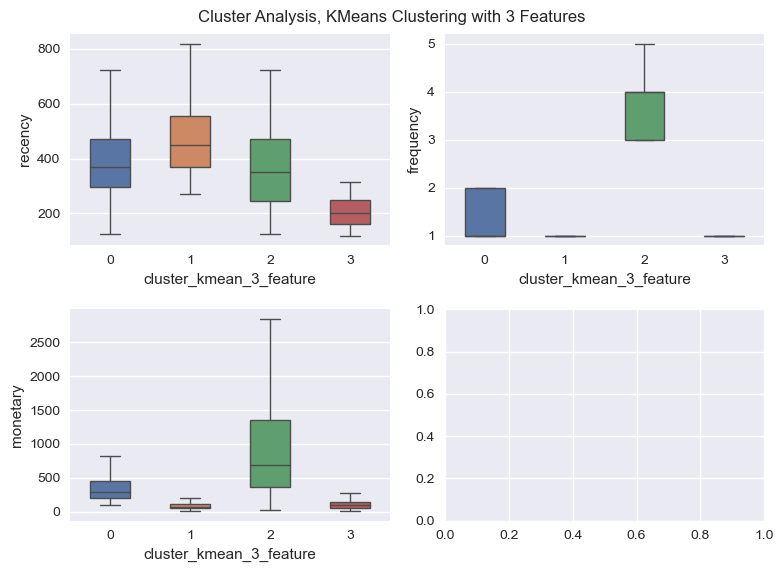

In [70]:
figsize = (8, 6)
cluster_boxplot(df_customer,'cluster_kmean_3_feature', three_features, 'KMeans',3)
plt.savefig('boxplot_cluster_analysis_kmeans_3_features',bbox_inches='tight',dpi=300)
plt.show()

Cluster 0: Peu d'achats recents, actif, depenses moderées. Regular client. <br>
Cluster 1: Pas d'achats recents, peu actif, depenses très bas. Bargain hunter. <br>
Cluster 2: Peu d'achats recents, très actif, depenses très élevées. Best client. <br>
Cluster 3: Achats recents, peu actif, depenses bas. Nouveau client <br>

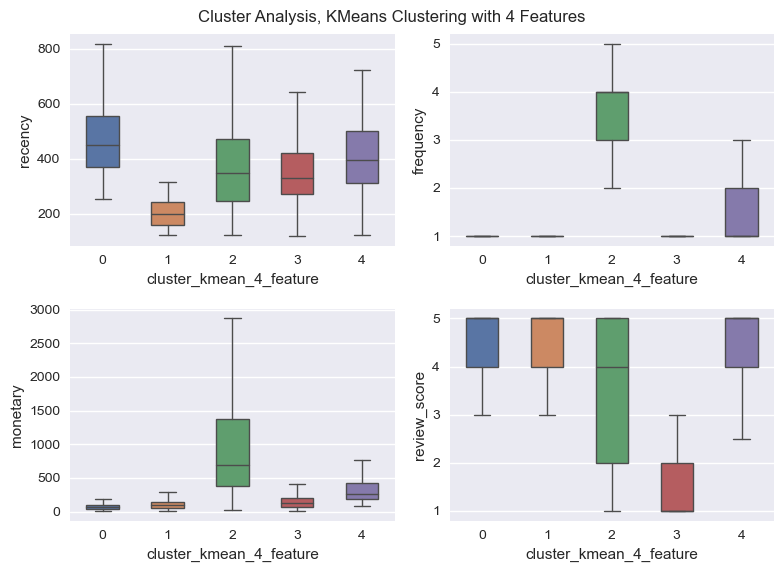

In [71]:
figsize = (8, 6)
cluster_boxplot(df_customer, 'cluster_kmean_4_feature',four_features, 'KMeans',4)
plt.savefig('boxplot_cluster_analysis_kmeans_4_features',bbox_inches='tight',dpi=300)
plt.show()

Cluster 0: pas des achats recents, peu actif, depenses très bas, très satisfait. Bargain hunter. <br>
Cluster 1: achats recents, peu actifs depenses bas, très satisfait. Nouveau client. <br>
Cluster 2: peu des achats recents, très actif, depenses très élevées, satisfaction variée. VIP client.<br>
Cluster 3: peu des achats recents, peu actif, dépenses moyennes, très insatisfait. Client exigeant <br>
Cluster 4: pas des achats recents, peu actif, depenses élevées, très satisfait. Client reguliere. <br>

In [72]:
from pandas.plotting import parallel_coordinates


def parallel_cooordinate_plot(data, model_name,variable, nb_feature):
    col = data.drop(columns=variable).columns
    data_scaled = pd.DataFrame(scaler.fit_transform(data[col]), columns=col)
    data_scaled[variable] = data[variable]

    plt.figure(figsize=(9, 3))
    parallel_coordinates(data_scaled, variable, colormap=plt.get_cmap("Set3"))
    plt.title(f"Parallel Coordinates Plot for {model_name} Clustering with {nb_feature} Features", fontsize=12)
    plt.show()

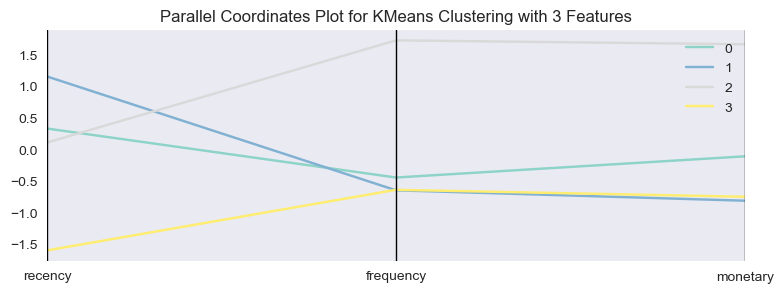

In [73]:
kmean_cluster_analysis_3_features = df_customer.groupby(
    'cluster_kmean_3_feature')[['recency', 'frequency', 'monetary']].mean().reset_index()
kmean_cluster_analysis_3_features = round(kmean_cluster_analysis_3_features,2)
parallel_cooordinate_plot(kmean_cluster_analysis_3_features, 'KMeans','cluster_kmean_3_feature', 3)

In [74]:
df_customer['cluster_kmean_4_feature'] =  kmean_4_features.labels_

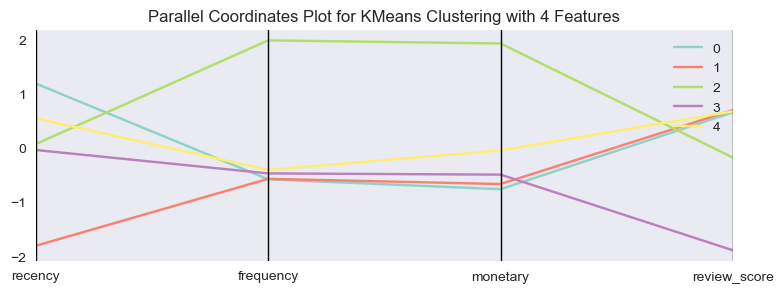

In [75]:
kmean_cluster_analysis_4_features = df_customer.groupby(
    'cluster_kmean_4_feature')[['recency', 'frequency', 'monetary','review_score']].mean().reset_index()
kmean_cluster_analysis_4_features = round(kmean_cluster_analysis_4_features,2)
parallel_cooordinate_plot(kmean_cluster_analysis_4_features, 'KMeans', 'cluster_kmean_4_feature', 4)

## DBSCAN

DBSCAN et le clustering hierarchical prennent beaucoup de temps à s'exécuter sur mon ordinateur avec l'intégralité de l'ensemble de données. Je n'utiliserai que la moitié du jeu de données pour tester ces deux modèles.

In [76]:
# Déterminer la taille du sous-echantillon
sample_size = int(len(df.order_id.unique())*0.5)

# Générer le sous-echantillon
order_id_sample = np.random.choice(df.order_id.unique(),size=sample_size)
df_subset = df[df.order_id.isin(order_id_sample)]
df_subset=df_subset.groupby('customer_id')[four_features].mean().reset_index()

In [77]:
# Preprocessing
df_dbscan = df_subset[four_features].copy()
df_dbscan[['recency','monetary']] = np.log(df_dbscan[['recency','monetary']])
df_dbscan_scaled = pd.DataFrame(scaler.fit_transform(df_dbscan), columns=four_features)

Les paramètres les plus importants pour DBSCAN sont epsilon et min_sample. Je vais essayer différentes combinaisons pour trouver le meilleur candidat ici.

In [78]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from itertools import product

eps_candidates = [0.5, 1.5, 5]
min_samples_candidates = [3, 10, 30]

best_params = {'eps': [],
               'min_sample': [],
               'silhouette_score': [],
               'nb_cluster': [],
               'clusters': [],
               'counts_per_cluster': []
               }

for eps, min_sample in product(eps_candidates, min_samples_candidates):
    dbscan = DBSCAN(eps=eps, min_samples=min_sample).fit(df_dbscan_scaled)

    score = silhouette_score(
        df_dbscan_scaled, dbscan.labels_, random_state=42)
    nb_clusters = len(np.unique(dbscan.labels_,))

    unique, counts = np.unique(dbscan.labels_, return_counts=True)

    best_params['eps'].append(eps)
    best_params['min_sample'].append(min_sample)
    best_params['silhouette_score'].append(score)
    best_params['nb_cluster'].append(nb_clusters)
    best_params['clusters'].append(unique)
    best_params['counts_per_cluster'].append(counts)

In [79]:
bdscan_best_params = pd.DataFrame(best_params)
bdscan_best_params

,eps,min_sample,silhouette_score,nb_cluster,clusters,counts_per_cluster
0,0.5,3,0.056325,57,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[330, 6509, 19441, 36, 3647, 3021, 896, 105, 4..."
1,0.5,10,0.061247,15,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[835, 6499, 19437, 3589, 3020, 887, 78, 2569, ..."
2,0.5,30,0.080562,9,"[-1, 0, 1, 2, 3, 4, 5, 6, 7]","[1730, 6482, 19429, 2628, 2977, 851, 2549, 549..."
3,1.5,3,0.804571,3,"[-1, 0, 1]","[35, 37214, 4]"
4,1.5,10,0.833730,2,"[-1, 0]","[64, 37189]"
5,1.5,30,0.806290,2,"[-1, 0]","[89, 37164]"
6,5.0,3,0.909220,3,"[-1, 0, 1]","[2, 37242, 9]"
7,5.0,10,0.926089,2,"[-1, 0]","[11, 37242]"
8,5.0,30,0.913311,2,"[-1, 0]","[16, 37237]"


La combinaison esp=0,5/ min_sample=30 donne les clusters de taille la plus uniforme. Nous pouvons observer qu'à mesure que les eps augmentent, les modèles produisent des clusters constitués d'un gros morceau et de beaucoup de bruit. <br>
Cependant, avoir 11 clusters n'est pas idéal non plus. Certains de ces 11 clusters doivent être très similaires les uns aux autres pour que le clustering puisse être complètement inutiles.

In [80]:
dbscan = DBSCAN(eps=0.5, min_samples=30).fit(df_dbscan_scaled)

In [81]:
df_subset['bdscan_cluster'] = dbscan.labels_

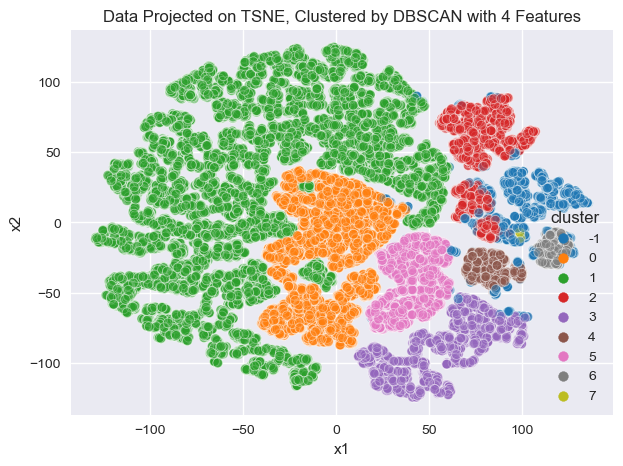

In [82]:
# tSNE plot avec des clusters
plt.style.use('seaborn-darkgrid')

plt.figure(figsize=(7,5))

cluster_viz_tsne(df_dbscan_scaled,dbscan.labels_, 'DBSCAN', 4)

plt.savefig('tsne_dbscan_4_features',bbox_inches='tight',dpi=300)
plt.show()

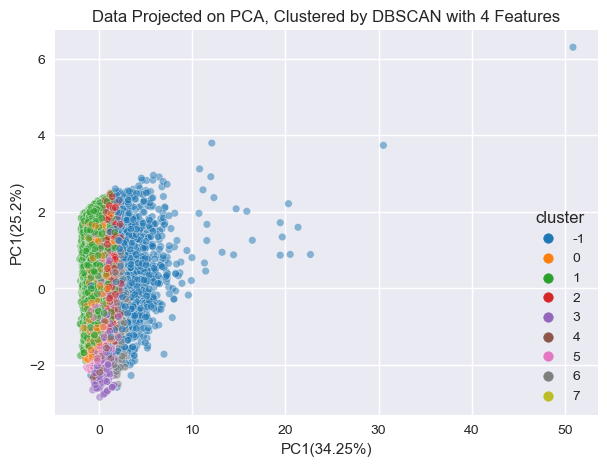

In [83]:
# APC plot avec des clusters
plt.style.use('seaborn-darkgrid')

plt.figure(figsize=(7,5))

cluster_viz_pca(df_dbscan_scaled,dbscan.labels_, 'DBSCAN', 4,)

plt.savefig('pca_dbscan_4_features',bbox_inches='tight',dpi=300)
plt.show()

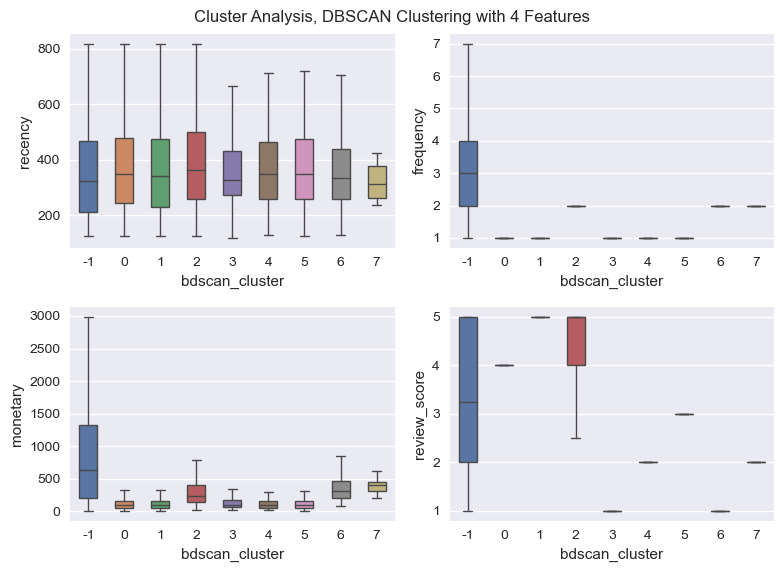

In [84]:
figsize = (8, 6)
cluster_boxplot(df_subset,'bdscan_cluster', four_features, 'DBSCAN',4)
plt.savefig('boxplot_cluster_analysis_dbscan_features',bbox_inches='tight',dpi=300)
plt.show()

Comme nous pouvons l'observer à partir du TSNE, de l'APC et des boxplots, ces clusters sont si similaires les uns aux autres que nous ne pouvons plus effectuer d'analyse de cluster efficace. <br>
En conclusion, DBSCAN n'est pas le modèle idéal pour ce projet.

## Hierachical clustering

In [85]:
import scipy.cluster.hierarchy as sch

In [86]:
df_hier = df_subset[four_features].copy()
df_hier['recency'] = np.log(df_hier['recency'])
df_hier['monetary'] = np.log(df_hier['monetary'])
df_hier_scaled = df_dbscan_scaled

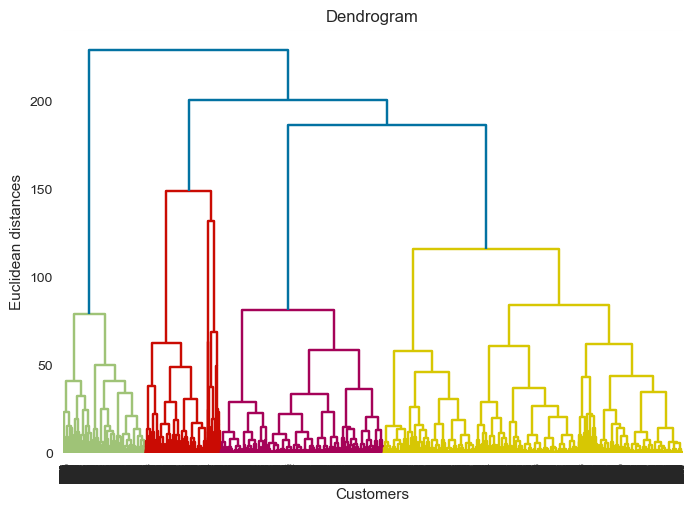

In [87]:
dendrogram = sch.dendrogram(sch.linkage(df_hier_scaled, method="ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.savefig('dendrogram',bbox_inches='tight',dpi=300)
plt.show()

En regardant le dendrogram, on peut observer 5 clusters distincts

In [88]:
from sklearn.cluster import AgglomerativeClustering 
hier_clustering = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='ward')

In [89]:
hier_cluster_labels = hier_clustering.fit_predict(df_hier_scaled)

In [90]:
df_hier_scaled['cluster'] = hier_cluster_labels
df_subset['hier_cluster'] = hier_cluster_labels

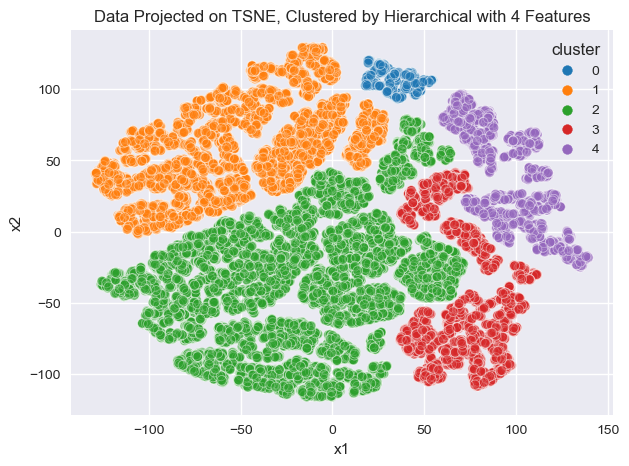

In [91]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(7,5))
cluster_viz_tsne(df_hier_scaled, hier_cluster_labels,'Hierarchical', 4)
plt.savefig('tsne_hier_4_features',bbox_inches='tight',dpi=300)
plt.show()

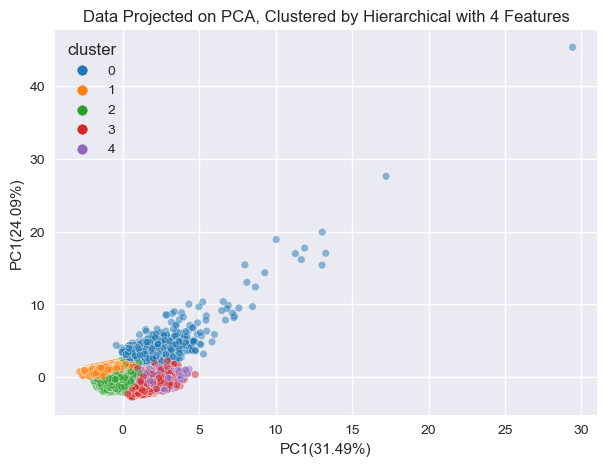

In [92]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(7,5))
cluster_viz_pca(df_hier_scaled,hier_cluster_labels, 'Hierarchical', 4,)
plt.savefig('pca_hier_4_features',bbox_inches='tight',dpi=300)
plt.show()

In [93]:
df_hier['cluster'] = hier_cluster_labels

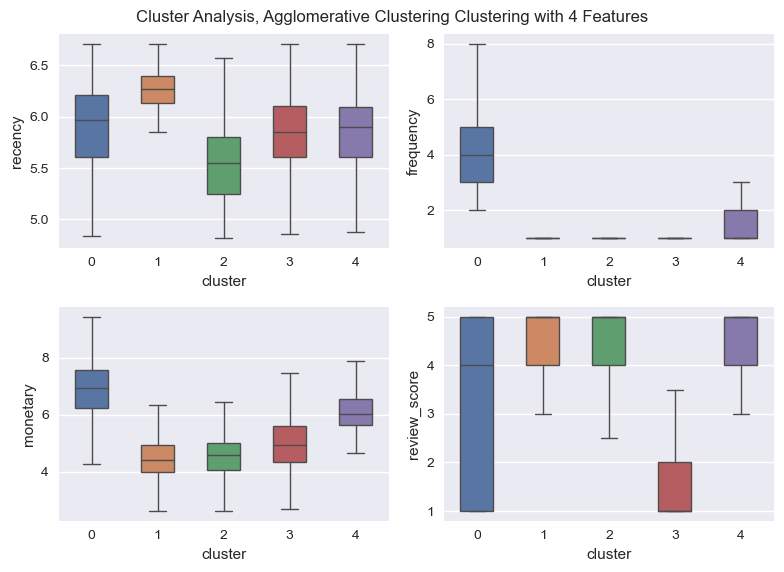

In [94]:
figsize = (8, 6)
cluster_boxplot(df_hier, 'cluster', four_features, 'Agglomerative Clustering',4)
plt.savefig('boxplot_cluster_analysis_hier_4_features',bbox_inches='tight',dpi=300)
plt.show()

Les clusters produits par le clustering agglomératif ont un caractère similaire à celui de Kmeans. Cependant, comme il s'agit d'un modèle très exigeant en termes de calcul,j e ne recommanderais pas cette technique étant donné la taille de la clientèle d'Olist.

## Model selection

Le modèle KMeans avec 5 clusters utilisant 4 features donne le meilleur résultat. Comme les clusters sont distincts et interprétables d'un point de vue commercial.

## Cluster analysis

In [95]:
df_clustered = df.merge(df_4_features[['customer_id','cluster']],how='inner',on='customer_id')

In [96]:
# Donner les labels pour chacque cluster
cluster_labels = {0: 'Bargain hunter',
                  1: 'New client',
                  2: 'VIP client',
                  3: 'Client exigeant',
                  4: 'Client régulier'}

df_clustered['cluster'].replace(cluster_labels, inplace=True)

### Distribution des cluster entre les top 5 villes

In [97]:
cluster_count_by_city = df_clustered[df_clustered['customer_city'].isin(top_5_customer_cities.index.to_list())]

In [98]:
cluster_count_by_city = cluster_count_by_city.groupby(['customer_city','cluster'])['cluster'].count().to_frame()
cluster_count_by_city.columns=['count']
cluster_count_by_city.reset_index(inplace=True)
cluster_count_by_city['count_bin']=pd.cut(cluster_count_by_city['count'],bins=[100,300,1000,3000,np.inf], 
                                          labels=['100~300', '300~1000','1000~3000','3000+'])

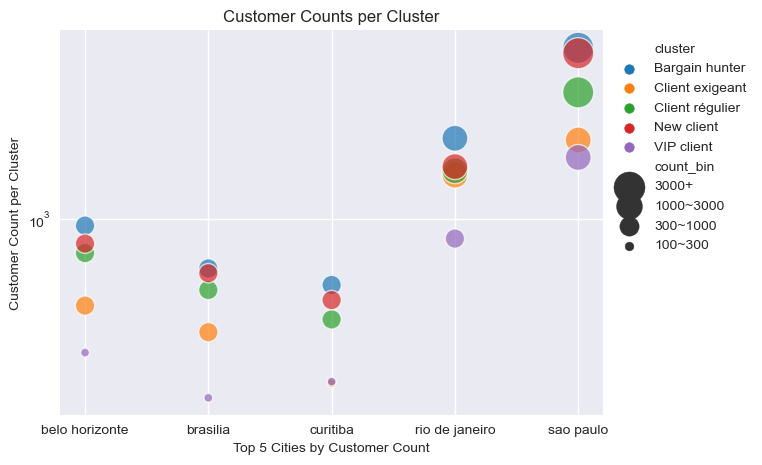

In [99]:
plt.figure(figsize=(7, 5))
size_order = np.flipud(['100~300', '300~1000', '1000~3000', '3000+'])
ax = sns.scatterplot(data=cluster_count_by_city,
                     x='customer_city',
                     y='count',
                     hue='cluster',
                     size='count_bin',
                     alpha=0.7,
                     sizes=(40, 500),
                     size_order=size_order,
                     palette='tab10',
                     linewidth=1,
                     edgecolor='white',
                     legend="full")

plt.yscale('log')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel('Top 5 Cities by Customer Count',fontsize=10)
plt.ylabel('Customer Count per Cluster', fontsize=10)
plt.title('Customer Counts per Cluster', fontsize=12)
plt.savefig('bubble_plot_cluster_per_city',bbox_inches='tight',dpi=300)
plt.show()

Sao Paulo est en tête dans chaque cluster. Rio a plus de clients sensibles aux prix.

### Chiffre d'affair par cluster

In [100]:
df_clustered.set_index('cluster', inplace=True)

bargain_hunter=df_clustered.loc['Bargain hunter'].copy()
new_client =df_clustered.loc['New client'].copy()
vip=df_clustered.loc['VIP client'].copy()
exigeant=df_clustered.loc['Client exigeant'].copy()
reguliers=df_clustered.loc['Client régulier'].copy()

df_clustered.reset_index(inplace=True)

In [101]:
def sales_evolution(subset,color,variable):
    X = subset.groupby(['order_date', 'order_id'])['payment_value'].sum().to_frame().reset_index()
    X = X.groupby('order_date')['payment_value'].mean().to_frame().reset_index().sort_values(by='payment_value', ascending=False)
    
    month = subset.groupby('order_monthyear')['order_id'].count().index.to_timestamp()
    purchase_amount = subset.groupby('order_monthyear')['payment_value'].sum().values
    nb_count = subset['customer_id'].count()
    
    plt.plot(month, purchase_amount, color=color,label=f"{variable} (count:{nb_count})")
    plt.xlim(left='2016-09-01',right='2018-08-01')

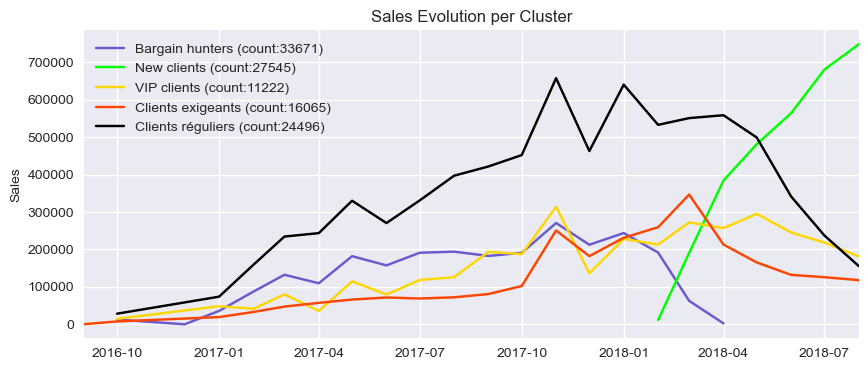

In [102]:
figure, ax = plt.subplots(1, 1, figsize=(10, 4))

ax=sales_evolution(bargain_hunter,'slateblue','Bargain hunters')
ax=sales_evolution(new_client,'lime','New clients')
ax=sales_evolution(vip,'gold','VIP clients')
ax=sales_evolution(exigeant,'orangered','Clients exigeants')
ax=sales_evolution(reguliers,'black','Clients réguliers')


plt.legend(loc='best')
plt.xlabel(None)
plt.ylabel('Sales',fontsize=10)
plt.title('Sales Evolution per Cluster',fontsize=12)
plt.savefig('line_plots_cluster_evolution',bbox_inches='tight',dpi=300)
plt.show()

Les clients réguliers génèrent la plupart des chiffres affaires. Les clients VIP ont beaucoup de pouvoir d'achat compte tenu de la taille de ce cluster.<br>
Remontée rapide de nouveaux clients au premier trimestre 2018. <br>
Baisse générale dans tous les clusters sauf nouveaux clients. Signalant un éventuel changement de stratégie de l'entreprise.

### Produit préféré par cluster

In [103]:
top_3_product_per_cluster=df_clustered.groupby(['cluster','product_category_name'])['product_category_name'].count().to_frame()
top_3_product_per_cluster.columns=['count']
top_3_product_per_cluster.reset_index(inplace=True)
top_3_product_per_cluster.sort_values(by=['cluster','count'], ascending=False,inplace=True)
top_3_product_per_cluster = top_3_product_per_cluster.groupby('cluster', as_index=False).nth[:3]

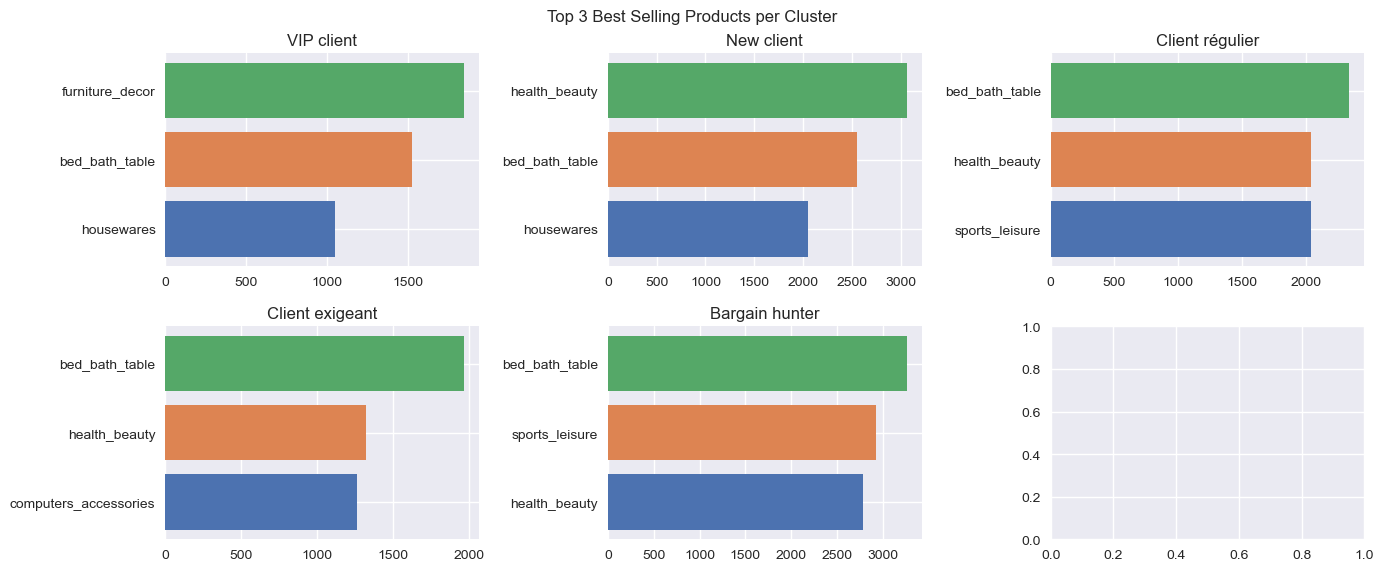

In [104]:
figure, axes = plt.subplots(nrows=2, ncols=3,figsize=(14, 6))
y = 0
for i, cluster in enumerate(top_3_product_per_cluster.cluster.unique()):
    X=top_3_product_per_cluster[top_3_product_per_cluster['cluster']==cluster].sort_values(by='count')
    bar_height=X['count']
    labels=X['product_category_name']
    i, j = divmod(y, 3)
    axes[i, j].barh(labels,bar_height,color=sns.color_palette('deep'))
    axes[i, j].set_title(cluster)
    y = y + 1
    
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.suptitle('Top 3 Best Selling Products per Cluster', fontsize=12)
plt.savefig('top_3_selling_product',bbox_inches='tight',dpi=300)
plt.show()

On peut observer qu'à l'exception de les clients exigeants, les autres clients sont orientés vers les produits de la maison et de lifestyle.

## Maintenaince

Estimer le temps qu'il faut pour réentraîner le modèle afin de produire un cluster précis. Aa métrique utilisée ici est le score ARI.<br>

Les étapes de cette tâche sont les suivantes :
- 1. Calculez le nombre de jours présents dans le dataset.
- 2. Déterminer le nombre de cycles pour un intervalle choisi. c'est-à-dire *nb_cycle = number_of_day / interval*
- 3. Obtenez une liste de dates qui partitionne uniformément l'ensemble de données en fonction du nb_cycle.
- 4. Utilisez ces dates comme point de départ pour découper l'ensemble de données.
- 5. Définir  le premier sous-echantillon F0 (taille > 200), qui est F0 = data.loc[begin_date_T0 : (begin_date_T0 - interval)]
- 6. Définir le deuxième sous-echantillon F1 (taille > 200), qui est F1 = data.loc[begin_date_T1 : (begin_date_T1 - interval)]
- 7. Scaler_0 transforme F0, puis crée model_0 où model_0 = model.fit(F0)
- 8. Scaler_0 transforme F1, puis crée model_1 où model_1 = model.fit(F1)
- 9. Obtenez des labels de cluster sur F1 avec model_1.labels_ (les "vraie" labels).
- 10. Obtenez également des labels de cluster sur F1 avec model_0.predict(Scaler_0.transform(F1)) (les labels 'predict'). Ici, en utilisant Scaler_0 au lieu de Scaler_1.
- 11. Utiliser les labels vraie et prédir come arguments à ARI pour obtenir un score.
- 12. Répétez ce processus pour l'ensemble des données pour obtnir une liste de ARI scores.
- 13. Obtenez le score ARI moyen pour cet intervalle choisi.
- 13. Répétez tout ce qui précède pour plusieurs valeurs d'intervalle différentes.
- 14. Comparer les résultats.

In [105]:
import datetime
from datetime import date, timedelta
from sklearn.metrics import adjusted_rand_score

In [106]:
df_maintenance = df[[
    'customer_id',
    'order_date',
    'recency',
    'frequency',
    'monetary',
    'review_score'
]]

df_maintenance = df_maintenance.drop_duplicates(
    subset=['customer_id', 'order_date'], keep='first')
df_maintenance = df_maintenance.sort_values(by='order_date')

In [107]:
# Obtenir le nombre total de jours dans les données
end = df_maintenance.order_date.max()
beginning = df_maintenance.order_date.min()
diff_days = (end-beginning).days

-----------------------------------------

In [108]:
# Une function pour obtnir une liste pour diviser le dataset
def get_start_dates(data, INTERVAL):
    X=data.reset_index()[['order_date','recency','frequency','monetary']]
    nb_cycle = int(diff_days/INTERVAL)

    date_candidats = pd.date_range(beginning, end, periods=nb_cycle).date.tolist()

    dates = []
    for date in date_candidats:
        dates.append(X.iloc[X.order_date.searchsorted(date),0])
        
    dates.sort(reverse=True)
    return dates

In [109]:
# Une fonction pour obtenir l'ARI score 
def get_ARI_score(data,T0,T1,INTERVAL):
    F0 = data.loc[T0:T0-datetime.timedelta(days=int(INTERVAL))].copy()
    F1 = data.loc[T1:T1-datetime.timedelta(days=int(INTERVAL))].copy()
    
    if (F0.shape[0] > 200) and (F1.shape[0] > 200):
        F0['recency'] = np.log(F0['recency'])
        F0['monetary'] = np.log(F0['monetary'])
        scaler_0 = scaler.fit(F0)
        X_0 = scaler_0.transform(F0)
        model_0 = KMeans(n_clusters=4, init='k-means++', random_state=42).fit(X_0)

        F1['recency'] = np.log(F1['recency'])
        F1['monetary'] = np.log(F1['monetary'])
        scaler_1 = scaler.fit(F1)
        X_1 = scaler_1.transform(F1)
        model_1 = KMeans(n_clusters=4, init='k-means++', random_state=42).fit(X_1)

        label_true = model_1.labels_
        label_pred = model_0.predict(scaler_0.transform(F1))
        return adjusted_rand_score(label_true, label_pred)

In [110]:
# Une fonction pour obtenir une liste des ARI scores pour l'ensemble de dataset pour un intervalle fixe
def get_ari_scores(data, start_date_list, INTERVAL):
    X = data.reset_index()
    subset = X.sort_values(
        by='order_date', ascending=False).set_index('order_date')
    subset = subset[four_features]

    scores = []
    for date in start_date_list:
        t0 = date
        t1 = date - datetime.timedelta(days=int(INTERVAL))

        score = get_ARI_score(data=subset,
                              T0=t0,
                              T1=t1,
                              INTERVAL=interval)
        scores.append(score)


    return scores

-------------------------------------------------------------------------------------

In [111]:
# Obtenez une liste des scores ARI moyens pour des intervalles entre 10 et 130 jours, tous les 7 jours.
interval_candidats = np.arange(14,130,7)
avg_ari_score_list = []

for interval in interval_candidats:
    start_dates = get_start_dates(df_maintenance, interval)
    ari_scores = get_ari_scores(df_maintenance, start_dates, interval)
    ari_scores_no_nan = [score for score in ari_scores if not(pd.isnull(score)) == True]
    avg_ARI = np.mean(ari_scores_no_nan)
    avg_ari_score_list.append(avg_ARI)

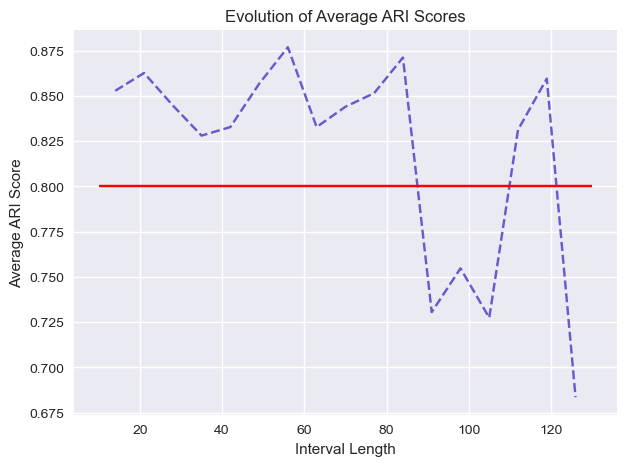

In [112]:
plt.figure(figsize=(7, 5))
plt.plot(interval_candidats, avg_ari_score_list, color='slateblue',linestyle='dashed')
plt.hlines(y=0.8, xmin=10, xmax=130, linestyle='-', color='red')
plt.xlabel('Interval Length')
plt.ylabel('Average ARI Score')
plt.title('Evolution of Average ARI Scores', fontsize=12)
plt.savefig('ari_evolution',bbox_inches='tight',dpi=300)
plt.show()

Comme le montre le graphique ci-dessus, à environ 85 jours, la précision de notre modèle n'est plus responsable. Je propose un entretien tous les 80 jours.

Fin projet.<br>
Merci.